# Project final:

Team:
- Kiều Hải Đăng - 19127347
- Lã Minh Hiếu - 19127400

In [2]:
import pandas as pd
import json
import string
import re

## 1. Collecting data:

**1.1 The subject of data:**

- The dataset about TED Talks on the TED.com

**1.2 The origin of data:**
- We get dataset form [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

**1.3 The licence of data:**
- The licence is [CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/)

**1.4 How did authors collect data?**
- The data has been scraped from the official TED Website.

**1.5 Data describtion**
- These datasets contain information of all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. 


## 2. Exploring data

- How many rows and how many columns?
- What is the meaning of each row?

    - Are there **duplicated** rows?
    - What is the meaning of each column?
    - What is the current data type of each column? Are there columns having inappropriate data types?
    
    - With each **numerical** column, how are values distributed?
        - What is the percentage of missing values?
        - Min? max? Are they abnormal?
        
    - With each **categorical** column, how are values distributed?
        - What is the percentage of missing values?
        - How many different values? Show a few
        - Are they abnormal?

In [3]:
ted_df = pd.read_csv('ted_main.csv')

#### How many rows and how many columns?

In [6]:
n_rows, n_cols = ted_df.shape
n_rows, n_cols

(2550, 17)

#### Are there duplicated rows?

In [5]:
ted_df.duplicated().any()

False

#### What is the meaning of each column?

- name: The official name of the TED Talk. Includes the title and the speaker.
- title: The title of the talk
- description: A blurb of what the talk is about.
- main_speaker: The first named speaker of the talk.
- speaker_occupation: The occupation of the main speaker.
- num_speaker: The number of speakers in the talk.
- duration: The duration of the talk in seconds.
- event: The TED/TEDx event where the talk took place.
- film_date: The Unix timestamp of the filming.
- published_date: The Unix timestamp for the publication of the talk on TED.com
- comments: The number of first level comments made on the talk.
- tags: The themes associated with the talk.
- languages: The number of languages in which the talk is available.
- ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- related_talks: A list of dictionaries of recommended talks to watch next.
- url: The URL of the talk.
- views: The number of views on the talk.

#### What is the current data type of each column? Are there columns having inappropriate data types?

In [7]:
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

- `Inappropriate data types`: film_date, published_date, ratings, related_talks, tags.

In [37]:
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'], unit='s')
ted_df['film_date'] = pd.to_datetime(ted_df['film_date'], unit='s')

In [38]:
a = ted_df['ratings'].str.extract(r'\[(.*)\]')
b = a.unstack()
c = b.str.replace('}, ', '}>>')
d = c.str.split('>>')
e = d.droplevel(0)

json_data = []

for i in range(0, len(e)):
    json_data.append([])
    for j in range(0, len(e[i])):
        my_str = e[i][j]
        js = my_str.replace("'", '"')
        json_data[i].append(js)

ted_df['ratings'] = json_data

In [116]:
a = ted_df['related_talks'].str.extract(r'\[(.*)\]')
b = a.unstack()
c = b.str.replace('}, ', '}>>')
d = c.str.split('>>')
e = d.droplevel(0)

json_data = []

for i in range(0, len(e)):
    json_data.append([])
    for j in range(0, len(e[i])):
        my_str = e[i][j]
        js = my_str.replace("'", '"')
        json_data[i].append(js)

ted_df['related_talks'] = json_data

/tmp/ipykernel_167/287396979.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  c = b.str.replace('}, ', '}>>')


In [159]:
#Test
ted_df['ratings'][0]

['{"id": 7, "name": "Funny", "count": 19645}',
 '{"id": 1, "name": "Beautiful", "count": 4573}',
 '{"id": 9, "name": "Ingenious", "count": 6073}',
 '{"id": 3, "name": "Courageous", "count": 3253}',
 '{"id": 11, "name": "Longwinded", "count": 387}',
 '{"id": 2, "name": "Confusing", "count": 242}',
 '{"id": 8, "name": "Informative", "count": 7346}',
 '{"id": 22, "name": "Fascinating", "count": 10581}',
 '{"id": 21, "name": "Unconvincing", "count": 300}',
 '{"id": 24, "name": "Persuasive", "count": 10704}',
 '{"id": 23, "name": "Jaw-dropping", "count": 4439}',
 '{"id": 25, "name": "OK", "count": 1174}',
 '{"id": 26, "name": "Obnoxious", "count": 209}',
 '{"id": 10, "name": "Inspiring", "count": 24924}']

#### With each numerical column, how are values distributed?

- What is the percentage of missing values?
- Min? max? Are they abnormal?

In [122]:
numerics = ['int16', 'int32', 'int64']
num_df = ted_df.select_dtypes(include=numerics)
num_df.describe()

,comments,duration,languages,num_speaker,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,191.562353,826.510196,27.326275,1.028235,1.698297e+06
std,282.315223,374.009138,9.563452,0.207705,2.498479e+06
min,2.000000,135.000000,0.000000,1.000000,5.044300e+04
25%,63.000000,577.000000,23.000000,1.000000,7.557928e+05
50%,118.000000,848.000000,28.000000,1.000000,1.124524e+06
75%,221.750000,1046.750000,33.000000,1.000000,1.700760e+06
max,6404.000000,5256.000000,72.000000,5.000000,4.722711e+07


#### With each categorical column, how are values distributed?

- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [123]:
cate_df.isnull().mean() * 100

description           0.000000
event                 0.000000
main_speaker          0.000000
name                  0.000000
ratings               0.000000
related_talks         0.000000
speaker_occupation    0.235294
tags                  0.000000
title                 0.000000
url                   0.000000
dtype: float64

In [160]:
ted_df.nunique(axis=0)

TypeError: unhashable type: 'list'

## 3. Asking meaningful questions

- What is the question?
- What are benefits of finding the answer?

1. Sự phân bố số lượng event qua các năm có đều không. Có gì bất thường không, covid chẳng hạn.
2. Nghề nghiệp nào khi thuyết trình sẽ có nhiều lượt view nhất? Lượt view đó có phụ thuộc vào danh tiếng, tiền tài, địa vị của nhân vật đó hay không?

## 4. Preprocessing + analyzing data to answer each question

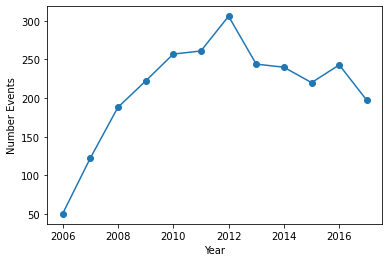

In [156]:
ted_df['year'] = pd.DatetimeIndex(ted_df['published_date']).year
Q1 = ted_df.groupby('year')['event'].count()
Q1.plot.line(ylabel = 'Number Events', xlabel = 'Year', marker='o');

## 5. Conclusion

## 6. Reflection

- Each member: What difficulties have you encountered?
- Each member: What have you learned?
- Your group: If you had more time, what would you do?

## 7. Reference
1. [Data set](https://www.kaggle.com/rounakbanik/ted-talks).
2. https://gocnhintangphat.com/timestamp-la-gi/.
3. https://rstudio-pubs-static.s3.amazonaws.com/321337_38458c80a3fb4edf8755e8bce876e822.html.
4. https://stackoom.com/en/question/3w6dO.
5. https://www.guru99.com/python-json.html.
6. https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.
7. https://pretagteam.com/question/how-to-replace-special-characters-in-a-string-python.

In [ ]:
cate_df = ted_df.select_dtypes(include=object)
cate_df.groupby('speaker_occupation').sum()
# abnormal: ratings, related_talks, tags
# Sự phân bố số lượng event qua các năm có đều không. Có gì bất thường không, covid chẳng hạn.
# Nghề nghiệp nào khi thuyết trình sẽ có nhiều lượt view nhất? Lượt view đó có phụ thuộc vào danh tiếng, tiền tài, địa vị của nhân vật đó hay không?

In [ ]:
a = ted_df.copy()
a.groupby('speaker_occupation').sum().sort_values('views', ascending=False)
# view, tags, comments, ratings, num event (TIME).

a[a['speaker_occupation'].isin(['Economist'])]